# Regresja liniowa dla zestawu danych "advertising"

In [271]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

In [273]:
def regresssion_linear_plot(X, y, coefs):
    plt.figure(figsize=(10,6))
    plt.scatter(X, y, color='r', marker='o' , s=30)
    
    y_pred = coefs[0]*X + coefs[1]
    plt.plot(X, y_pred, color='b')

    plt.title('Linear Regression')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.grid('on')
    plt.show()

In [275]:
def scatter_line_plot(xs, ys, x, y):
    plt.figure(figsize=(10,6))
    plt.scatter(xs, ys, color='r', marker='o' , s=30)
    plt.plot(x, y, color='b')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.grid('on')
    plt.show()

In [277]:
url = 'https://raw.githubusercontent.com/erkansirin78/datasets/refs/heads/master/Advertising.csv'
df = pd.read_csv(url)

print(df.head())

   ID     TV  Radio  Newspaper  Sales
0   1  230.1   37.8       69.2   22.1
1   2   44.5   39.3       45.1   10.4
2   3   17.2   45.9       69.3    9.3
3   4  151.5   41.3       58.5   18.5
4   5  180.8   10.8       58.4   12.9


Sprawdzamy korelacje pomiędzy kolumnami

In [279]:
TV_Sale_corr = pearsonr(df.TV, df.Sales)
Radio_Sale_corr = pearsonr(df.Radio, df.Sales)
Newspaper_Sale_corr = pearsonr(df.Newspaper, df.Sales)

print(f"TV_Sale_corr = {TV_Sale_corr[0]}; Radio_Sale_corr = {Radio_Sale_corr[0]}; Newspaper_Sale_corr = {Newspaper_Sale_corr[0]}")

TV_Sale_corr = 0.7822244248616065; Radio_Sale_corr = 0.576222574571055; Newspaper_Sale_corr = 0.2282990263761654


In [281]:
correlation_matrix = df[['TV', 'Radio', 'Newspaper', 'Sales']].corr(numeric_only=True)
print(correlation_matrix)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


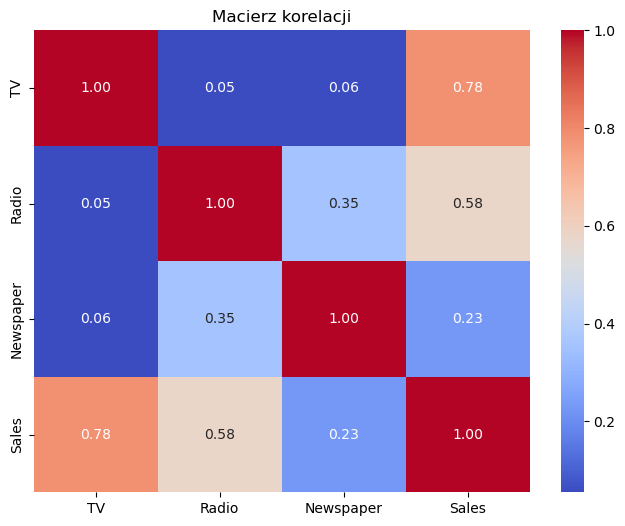

In [283]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['TV', 'Radio', 'Newspaper', 'Sales']].corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Macierz korelacji")
plt.show()

In [285]:
df = pd.read_csv(url, usecols=['TV','Sales'])

print(df.head())

      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


In [289]:
X = df.TV.values.reshape(-1,1)
y = df.Sales.values.reshape(-1,1)

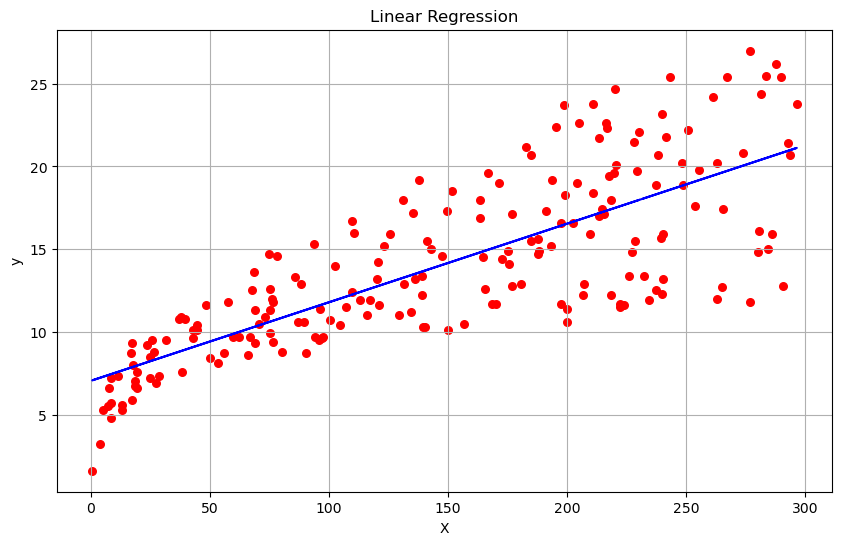

In [291]:
model = LinearRegression()
model.fit(X, y)
model.coef_, model.intercept_
a, b = model.coef_[0], model.intercept_[0]
coefs = (a, b)
regresssion_linear_plot(X, y, coefs)

Ocena dopasowania

In [293]:
y_pred = model.predict(X)

R2 = r2_score(y, y_pred)
MSE = mean_squared_error(y, y_pred)
RMSE = root_mean_squared_error(y, y_pred)
MAE = mean_absolute_error(y, y_pred)

print(f"R2 = {R2}; MSE = {MSE}; RMSE = {RMSE}; MAE = {MAE}")

R2 = 0.611875050850071; MSE = 10.512652915656757; RMSE = 3.2423221486546887; MAE = 2.549806038927486


# Regresja wielomianowa

Generowanie danych rozrzuconych wokół zależności wielomianowej

In [295]:
np.random.seed(0)
n = 200
X = 10*np.random.normal(0, 1, n)
y = 10*X - 0.5*(X**2) + 1*(X**3) + np.random.normal(-5, 5, n)

X = X.reshape(-1,1)
y = y.reshape(-1,1)

Budowa modelu liniowego

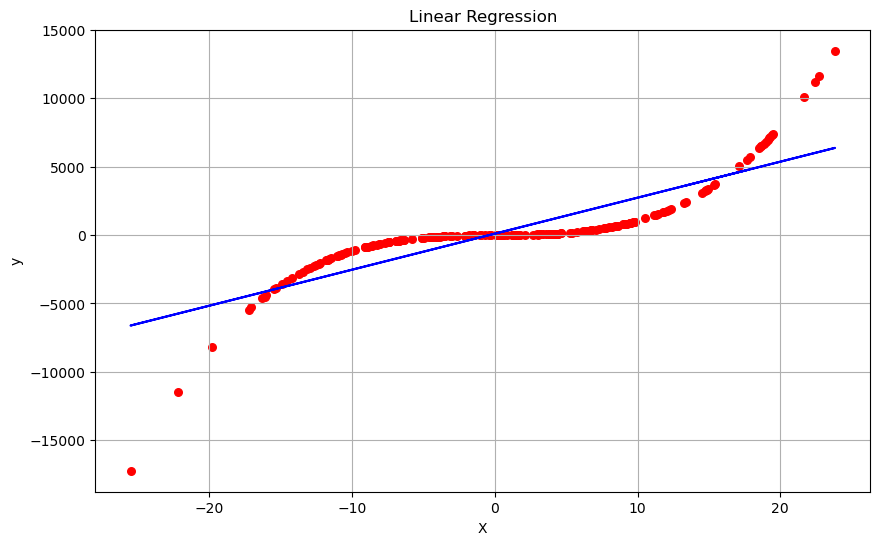

In [297]:
model = LinearRegression()
model.fit(X, y)
model.coef_, model.intercept_
a, b = model.coef_[0], model.intercept_[0]
coefs = (a, b)
regresssion_linear_plot(X, y, coefs)

In [299]:
y_pred = model.predict(X)

R2 = r2_score(y, y_pred)
MSE = mean_squared_error(y, y_pred)
RMSE = root_mean_squared_error(y, y_pred)
MAE = mean_absolute_error(y, y_pred)

print(f"R2 = {R2}; MSE = {MSE}; RMSE = {RMSE}; MAE = {MAE}")

R2 = 0.7273705205630909; MSE = 2709928.573961766; RMSE = 1646.1860690583449; MAE = 1219.9881819230025


Budowa modelu wielomianowego

In [301]:
from sklearn.preprocessing import PolynomialFeatures

In [303]:
pf = PolynomialFeatures(degree=3)
pf.fit_transform([[2], [3], [4]]) # 1, x, x^2, x^3

array([[ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

In [305]:
pf = PolynomialFeatures(degree=3)
X_polynomial = pf.fit_transform(X)

model = LinearRegression()
model.fit(X_polynomial, y)

y_pred = model.predict(X_polynomial)

R2 = r2_score(y, y_pred)
MSE = mean_squared_error(y, y_pred)
RMSE = root_mean_squared_error(y, y_pred)
MAE = mean_absolute_error(y, y_pred)

print(f"R2 = {R2}; MSE = {MSE}; RMSE = {RMSE}; MAE = {MAE}")

R2 = 0.9999977812756196; MSE = 22.05405156030359; RMSE = 4.696174140755812; MAE = 3.7095283944857544


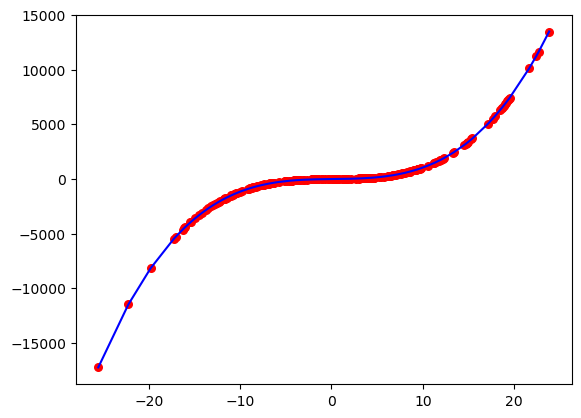

In [307]:
sorted_zip = sorted(zip(X, y_pred))
x_, y_ = zip(*sorted_zip)
plt.scatter(X, y, color='r', marker='o' , s=30)
plt.plot(x_, y_, '-b')

In [242]:
model.coef_

array([[ 0.        , 10.04538829, -0.49799353,  0.99993862]])

In [244]:
model.intercept_

array([-5.86161978])

In [309]:
def sort_points(x, y):
    sorted_zip = sorted(zip(x, y))
    x_, y_ = zip(*sorted_zip)
    return x_, y_

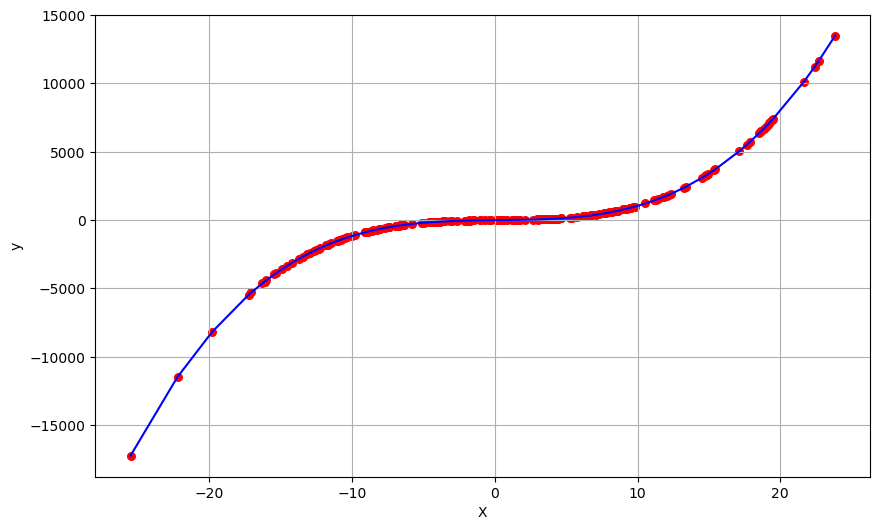

In [311]:
x_, y_ = sort_points(X, y_pred)
scatter_line_plot(X, y, x_, y_)

# Regularyzacja

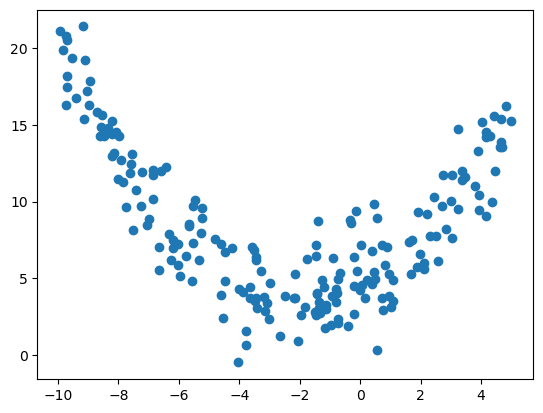

In [325]:
np.random.seed(0)
n = 200
X = np.random.uniform(-10,5, n)
y = 0.25 * (X**2) + X + 5 + 2*np.random.normal(0,1, n)

X = X.reshape(-1,1)
y = y.reshape(-1,1)
plt.scatter(X, y)
plt.show()

In [327]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

R2 = 0.7381725484538229; MSE = 6.2450713201221495; RMSE = 2.4990140696126844; MAE = 1.986663906067884


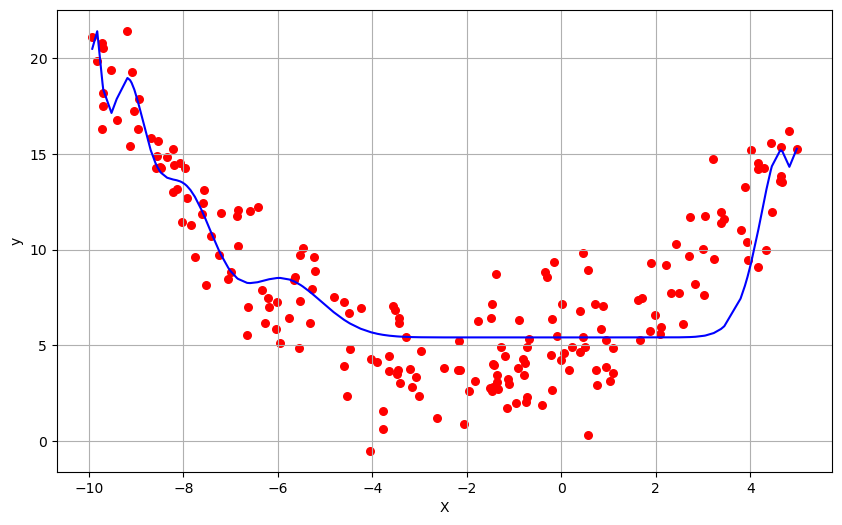

In [381]:
pf = PolynomialFeatures(degree=25)
X_polynomial = pf.fit_transform(X)

model = LinearRegression()
model.fit(X_polynomial, y)

y_pred = model.predict(X_polynomial)

R2 = r2_score(y, y_pred)
MSE = mean_squared_error(y, y_pred)
RMSE = root_mean_squared_error(y, y_pred)
MAE = mean_absolute_error(y, y_pred)

print(f"R2 = {R2}; MSE = {MSE}; RMSE = {RMSE}; MAE = {MAE}")

x_, y_ = sort_points(X, y_pred)
scatter_line_plot(X, y, x_, y_)

Bez regularyzacji: R2 = 0.7381725484538229; MSE = 6.2450713201221495; RMSE = 2.4990140696126844; MAE = 1.986663906067884
Lasso: R2 = 0.8090092222151946; MSE = 4.555485002462976; RMSE = 2.134358217934135; MAE = 1.7361223676349773
Ridge: R2 = 0.7205195660635952; MSE = 6.666127757821116; RMSE = 2.5818845361133245; MAE = 2.0942573299686353
ElasticNet: R2 = 0.8308424652438381; MSE = 4.034721579612367; RMSE = 2.0086616389059575; MAE = 1.6358117722514534


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.758e+02, tolerance: 4.770e-01
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.542e+02, tolerance: 4.770e-01
  model = cd_fast.enet_coordinate_descent(


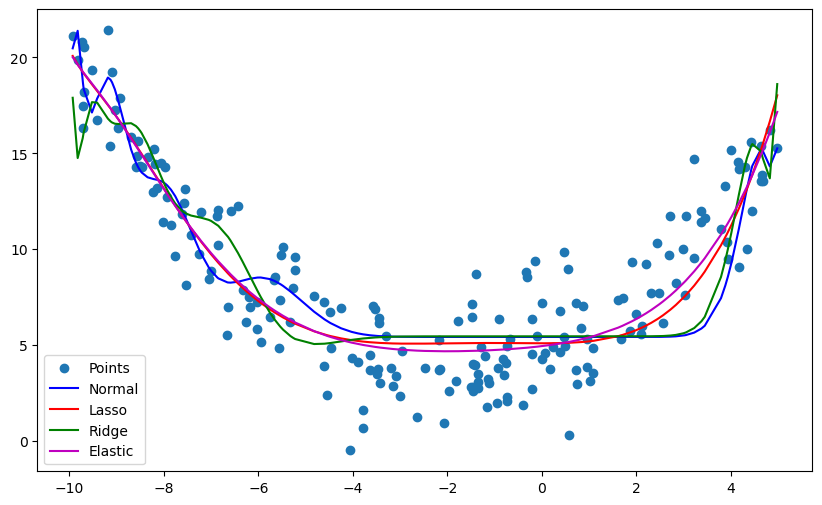

In [385]:
plt.figure(figsize=(10,6))
plt.scatter(X, y)

# brak regularyzacji

model = LinearRegression()
model.fit(X_polynomial, y)
y_pred = model.predict(X_polynomial)

R2 = r2_score(y, y_pred)
MSE = mean_squared_error(y, y_pred)
RMSE = root_mean_squared_error(y, y_pred)
MAE = mean_absolute_error(y, y_pred)

print(f"Bez regularyzacji: R2 = {R2}; MSE = {MSE}; RMSE = {RMSE}; MAE = {MAE}")
x_, y_ = sort_points(X, y_pred)
plt.plot(x_, y_, color='b')

# Lasso
model = Lasso(alpha=1, random_state=42)
model.fit(X_polynomial, y)
y_pred = model.predict(X_polynomial)

R2 = r2_score(y, y_pred)
MSE = mean_squared_error(y, y_pred)
RMSE = root_mean_squared_error(y, y_pred)
MAE = mean_absolute_error(y, y_pred)

print(f"Lasso: R2 = {R2}; MSE = {MSE}; RMSE = {RMSE}; MAE = {MAE}")
x_, y_ = sort_points(X, y_pred)
plt.plot(x_, y_, color='r')

# Ridge
model = Ridge(alpha=1, random_state=42)
model.fit(X_polynomial, y)
y_pred = model.predict(X_polynomial)

R2 = r2_score(y, y_pred)
MSE = mean_squared_error(y, y_pred)
RMSE = root_mean_squared_error(y, y_pred)
MAE = mean_absolute_error(y, y_pred)

print(f"Ridge: R2 = {R2}; MSE = {MSE}; RMSE = {RMSE}; MAE = {MAE}")
x_, y_ = sort_points(X, y_pred)
plt.plot(x_, y_, color='g')


# ElasticNet
model = ElasticNet(alpha=1, random_state=42)
model.fit(X_polynomial, y)
y_pred = model.predict(X_polynomial)

R2 = r2_score(y, y_pred)
MSE = mean_squared_error(y, y_pred)
RMSE = root_mean_squared_error(y, y_pred)
MAE = mean_absolute_error(y, y_pred)

print(f"ElasticNet: R2 = {R2}; MSE = {MSE}; RMSE = {RMSE}; MAE = {MAE}")
x_, y_ = sort_points(X, y_pred)
plt.plot(x_, y_, color='m')

plt.legend(['Points','Normal','Lasso','Ridge','Elastic'])
plt.show()

# Regresja wielu zmiennych

R2 = 0.5757877060324508; MSE = 0.5558915986952444; RMSE = 0.7455813830127764; MAE = 0.5332001304956554


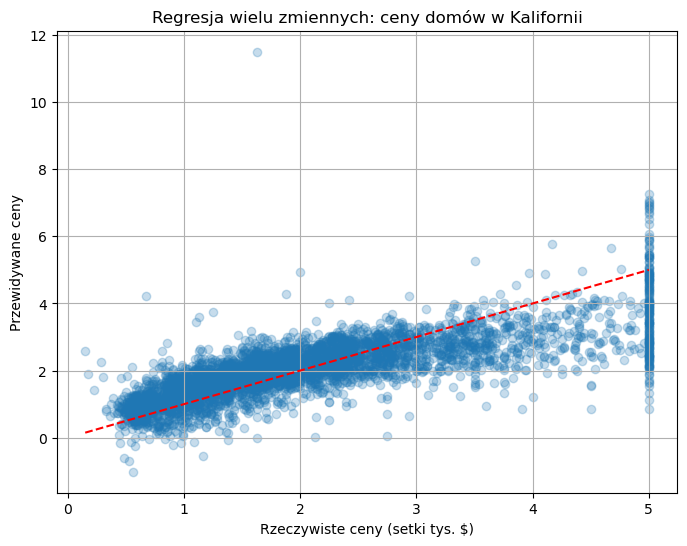

In [413]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Wczytywanie danych
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target  # mediana wartości domów w setkach tys. $

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tworzenie i trenowanie modelu regresji
model = LinearRegression()
model.fit(X_train, y_train)

# Predykcje
y_pred = model.predict(X_test)

# Ocena modelu
R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = root_mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

print(f"R2 = {R2}; MSE = {MSE}; RMSE = {RMSE}; MAE = {MAE}")

# Wykres: przewidywane vs rzeczywiste ceny
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.25)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Rzeczywiste ceny (setki tys. $)")
plt.ylabel("Przewidywane ceny")
plt.title("Regresja wielu zmiennych: ceny domów w Kalifornii")
plt.grid(True)
plt.show()

- Standaryzacja danych (StandardScaler)
- Sprawdzenie ważności cech (model.coef_)
- Użycie regularyzacji (ridge) lub Lasso
- Mapa cieplna korelacji między zmiennymi